# Task 1

# Exploring Datasets


<b>opening dataset<b>


In [1]:
# we have to use 10 percent data 
import pandas as pd
df=pd.read_csv("kddcup.data_10_percent_corrected.csv")
df.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [2]:
#Convert to string data type
df_str = df['normal.'].astype(str)
print(df.dtypes)


0            int64
tcp         object
http        object
SF          object
181          int64
5450         int64
0.1          int64
0.2          int64
0.3          int64
0.4          int64
0.5          int64
1            int64
0.6          int64
0.7          int64
0.8          int64
0.9          int64
0.10         int64
0.11         int64
0.12         int64
0.13         int64
0.14         int64
0.15         int64
8            int64
8.1          int64
0.00       float64
0.00.1     float64
0.00.2     float64
0.00.3     float64
1.00       float64
0.00.4     float64
0.00.5     float64
9            int64
9.1          int64
1.00.1     float64
0.00.6     float64
0.11.1     float64
0.00.7     float64
0.00.8     float64
0.00.9     float64
0.00.10    float64
0.00.11    float64
normal.     object
dtype: object


In [3]:
# renaming columns 
# we will use normal name as column for attack in couple of questions
df.rename(columns={'normal.': 'normal',
                    '0':'duration',
                  'tcp':'protocol',
                  '181':'src_bytes'}, inplace=True)

In [4]:
df.head()

,duration,protocol,http,SF,src_bytes,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


 <B> normal= attack column as in question <B>

# Q1- Perform Zscore Normalization of the values in column duation, Subsitute the values in column by normalization

<b> find zscore <b>

In [5]:
# first column is duration column and i already stated above, its not replacing column name
from scipy import stats
#df['0'].apply(zscore)
zscore=stats.zscore(df['duration'])
zscore

array([-0.06779179, -0.06779179, -0.06779179, ..., -0.06779179,
       -0.06779179, -0.06779179])

In [6]:
len(zscore)

494020

<b> subsitute <b>

In [7]:
df['Zscore_duration'] = zscore 


In [8]:
df.head()

,duration,protocol,http,SF,src_bytes,5450,0.1,0.2,0.3,0.4,...,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal,Zscore_duration
0,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,-0.067792
1,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,-0.067792
2,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,-0.067792
3,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,-0.067792
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,-0.067792


In [10]:
# removing duration column, because we created zscore duration
df=df.drop(['duration'],axis=1)
df.head()

,protocol,http,SF,src_bytes,5450,0.1,0.2,0.3,0.4,0.5,...,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal,Zscore_duration
0,tcp,http,SF,239,486,0,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,-0.067792
1,tcp,http,SF,235,1337,0,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,-0.067792
2,tcp,http,SF,219,1337,0,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,-0.067792
3,tcp,http,SF,217,2032,0,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,-0.067792
4,tcp,http,SF,217,2032,0,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,-0.067792


<h2> so we changed duration column with zscore_duration with new subsitute values <h2>

# Q2- discretize the value in column Attack such that each occurence of normal is subsituted at -1 and all other values as -1

In [11]:
df['normal'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [12]:
df['normal'].value_counts()


smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: normal, dtype: int64

In [13]:
# libraries we have to use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [14]:
# to rename all normal values to 1, and rest to -1
df["normal"].replace({"normal.": "-1", "buffer_overflow.": "1","loadmodule": "1","perl.": "1","neptune.": "1",
                     "smurf.": "1","guess_passwd.": "1","pod.": "1","teardrop.": "1" ,
                      "portsweep.": "1","ipsweep.": "1","land.": "1","ftp_write.": "1",
                     "back.": "1","imap.": "1","satan.": "1","phf.": "1",
                      "nmap.": "1","multihop.": "1","warezmaster.": "1",
                      "spy.": "1","rootkit.": "1","warezclient.": "1","loadmodule.": "1"}, inplace=True)
df.head(10)

,protocol,http,SF,src_bytes,5450,0.1,0.2,0.3,0.4,0.5,...,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal,Zscore_duration
0,tcp,http,SF,239,486,0,0,0,0,0,...,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,-1,-0.067792
1,tcp,http,SF,235,1337,0,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,-1,-0.067792
2,tcp,http,SF,219,1337,0,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,-1,-0.067792
3,tcp,http,SF,217,2032,0,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,-1,-0.067792
4,tcp,http,SF,217,2032,0,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,-1,-0.067792
5,tcp,http,SF,212,1940,0,0,0,0,0,...,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,-1,-0.067792
6,tcp,http,SF,159,4087,0,0,0,0,0,...,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,-1,-0.067792
7,tcp,http,SF,210,151,0,0,0,0,0,...,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,-1,-0.067792
8,tcp,http,SF,212,786,0,0,0,1,0,...,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,-1,-0.067792
9,tcp,http,SF,210,624,0,0,0,0,0,...,1.0,0.0,0.06,0.05,0.0,0.0,0.0,0.0,-1,-0.067792


In [15]:
df_s = df['normal'].astype(int)
print(df.dtypes)


protocol            object
http                object
SF                  object
src_bytes            int64
5450                 int64
0.1                  int64
0.2                  int64
0.3                  int64
0.4                  int64
0.5                  int64
1                    int64
0.6                  int64
0.7                  int64
0.8                  int64
0.9                  int64
0.10                 int64
0.11                 int64
0.12                 int64
0.13                 int64
0.14                 int64
0.15                 int64
8                    int64
8.1                  int64
0.00               float64
0.00.1             float64
0.00.2             float64
0.00.3             float64
1.00               float64
0.00.4             float64
0.00.5             float64
9                    int64
9.1                  int64
1.00.1             float64
0.00.6             float64
0.11.1             float64
0.00.7             float64
0.00.8             float64
0

<h2> all normal values are subsitued as -1 and other values in duration as 1 <h2>

# Q 3- Perform One hot Hot encoding in protocol type to check difference of udp, tcp and icmp check unique values.

In [16]:
df['protocol'].value_counts()


icmp    283602
tcp     190064
udp      20354
Name: protocol, dtype: int64

In [17]:
protocol_type=pd.get_dummies(df["protocol"])
protocol_type

,icmp,tcp,udp
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
494015,0,1,0
494016,0,1,0
494017,0,1,0
494018,0,1,0


In [18]:
df['protocol_type_icmp'] = protocol_type['icmp'] 
df['protocol_type_tcp'] = protocol_type['tcp'] 
df['protocol_type_udp'] = protocol_type['udp'] 

df.head()

,protocol,http,SF,src_bytes,5450,0.1,0.2,0.3,0.4,0.5,...,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal,Zscore_duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,tcp,http,SF,239,486,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
1,tcp,http,SF,235,1337,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
2,tcp,http,SF,219,1337,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
3,tcp,http,SF,217,2032,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
4,tcp,http,SF,217,2032,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0


In [19]:
# drop protocol column because we created one hot encoded column from it which are 3 in numbers
df=df.drop(['protocol'],axis=1)
df.head(20)

,http,SF,src_bytes,5450,0.1,0.2,0.3,0.4,0.5,1,...,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal,Zscore_duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,http,SF,239,486,0,0,0,0,0,1,...,0.00,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
1,http,SF,235,1337,0,0,0,0,0,1,...,0.00,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
2,http,SF,219,1337,0,0,0,0,0,1,...,0.00,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
3,http,SF,217,2032,0,0,0,0,0,1,...,0.00,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
4,http,SF,217,2032,0,0,0,0,0,1,...,0.00,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
5,http,SF,212,1940,0,0,0,0,0,1,...,0.04,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
6,http,SF,159,4087,0,0,0,0,0,1,...,0.04,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
7,http,SF,210,151,0,0,0,0,0,1,...,0.04,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
8,http,SF,212,786,0,0,0,1,0,1,...,0.05,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0
9,http,SF,210,624,0,0,0,0,0,1,...,0.05,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0


In [20]:
df.tail(3)

,http,SF,src_bytes,5450,0.1,0.2,0.3,0.4,0.5,1,...,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal,Zscore_duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
494017,http,SF,203,1200,0,0,0,0,0,1,...,0.05,0.06,0.01,0.0,0.0,-1,-0.067792,0,1,0
494018,http,SF,291,1200,0,0,0,0,0,1,...,0.05,0.04,0.01,0.0,0.0,-1,-0.067792,0,1,0
494019,http,SF,219,1234,0,0,0,0,0,1,...,0.05,0.00,0.01,0.0,0.0,-1,-0.067792,0,1,0


<b> so we have done with one hot encoding <b>

# Q4 Divide Src_bytes into 5 bins and then replace by corresponding number

<b> what we will do is, divide whole lenght into 5 bins by two methods and then we will create another two columns infront of it to show each correspondence. we can do by replace method but was a ordinary method that would be unique in class <b>

In [21]:
qcut_bin=pd.qcut(df['src_bytes'].rank(method='first'), 5)
qcut_bin

0         (98804.8, 197608.6]
1         (98804.8, 197608.6]
2         (98804.8, 197608.6]
3         (98804.8, 197608.6]
4         (98804.8, 197608.6]
                 ...         
494015    (98804.8, 197608.6]
494016    (98804.8, 197608.6]
494017    (98804.8, 197608.6]
494018    (98804.8, 197608.6]
494019    (98804.8, 197608.6]
Name: src_bytes, Length: 494020, dtype: category
Categories (5, interval[float64]): [(0.999, 98804.8] < (98804.8, 197608.6] < (197608.6, 296412.4] < (296412.4, 395216.2] < (395216.2, 494020.0]]

In [23]:
# divide in 5 equal parts by using qcut function
pd.value_counts(qcut_bin)

(395216.2, 494020.0]    98804
(296412.4, 395216.2]    98804
(197608.6, 296412.4]    98804
(98804.8, 197608.6]     98804
(0.999, 98804.8]        98804
Name: src_bytes, dtype: int64

In [24]:
# we will set each bin by self given values to easily remind in new column
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['src_bytes_self_name'] = pd.qcut(df['src_bytes'].rank(method='first'),
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,http,SF,src_bytes,5450,0.1,0.2,0.3,0.4,0.5,1,...,0.00.8,0.00.9,0.00.10,0.00.11,normal,Zscore_duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,src_bytes_self_name
0,http,SF,239,486,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver
1,http,SF,235,1337,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver
2,http,SF,219,1337,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver
3,http,SF,217,2032,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver
4,http,SF,217,2032,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver


In [25]:
# to count whether the ans is correct or not. so having same number distribution as above. so its correct
df['src_bytes_self_name'].value_counts()

Diamond     98804
Platinum    98804
Gold        98804
Silver      98804
Bronze      98804
Name: src_bytes_self_name, dtype: int64

In [26]:
# creating another column to set bins in number from 1 to 5
df['src_bytes_self_name_2'] = pd.qcut(df['src_bytes'].rank(method='first'),
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False,
                            precision=0)
df.head()

,http,SF,src_bytes,5450,0.1,0.2,0.3,0.4,0.5,1,...,0.00.9,0.00.10,0.00.11,normal,Zscore_duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,src_bytes_self_name,src_bytes_self_name_2
0,http,SF,239,486,0,0,0,0,0,1,...,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver,1
1,http,SF,235,1337,0,0,0,0,0,1,...,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver,1
2,http,SF,219,1337,0,0,0,0,0,1,...,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver,1
3,http,SF,217,2032,0,0,0,0,0,1,...,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver,1
4,http,SF,217,2032,0,0,0,0,0,1,...,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver,1


<b> one can see that we have didivde as well as gave couple of self given names to bins 1,2,3,4,5 and silver, bronze etc as well <b>

In [28]:
# another method to divide bins, but we will not use for replacing as done before
bins=pd.cut(df['src_bytes'], bins=5)
bins

0         (-693375.64, 138675128.0]
1         (-693375.64, 138675128.0]
2         (-693375.64, 138675128.0]
3         (-693375.64, 138675128.0]
4         (-693375.64, 138675128.0]
                    ...            
494015    (-693375.64, 138675128.0]
494016    (-693375.64, 138675128.0]
494017    (-693375.64, 138675128.0]
494018    (-693375.64, 138675128.0]
494019    (-693375.64, 138675128.0]
Name: src_bytes, Length: 494020, dtype: category
Categories (5, interval[float64]): [(-693375.64, 138675128.0] < (138675128.0, 277350256.0] < (277350256.0, 416025384.0] < (416025384.0, 554700512.0] < (554700512.0, 693375640.0]]

In [27]:
pd.value_counts(bins)

(-693375.64, 138675128.0]     494019
(554700512.0, 693375640.0]         1
(416025384.0, 554700512.0]         0
(277350256.0, 416025384.0]         0
(138675128.0, 277350256.0]         0
Name: 181, dtype: int64

In [ ]:
# only the reason is because this method not distributes fix, however above method done it with fix distribution

# Q 5 - Treat Attack column as binary technique , normal represents negative class and all other represents positive class
<b> Attack column is normal column in our dataset <b>

<b> As we already done this question in question 1, here we will use general tree classifier algo to classify them as positive or negative <b>

In [29]:
# to see first three rows
df.head(3)

,http,SF,src_bytes,5450,0.1,0.2,0.3,0.4,0.5,1,...,0.00.9,0.00.10,0.00.11,normal,Zscore_duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,src_bytes_self_name,src_bytes_self_name_2
0,http,SF,239,486,0,0,0,0,0,1,...,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver,1
1,http,SF,235,1337,0,0,0,0,0,1,...,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver,1
2,http,SF,219,1337,0,0,0,0,0,1,...,0.0,0.0,0.0,-1,-0.067792,0,1,0,Silver,1


In [31]:
# to count and see difference of negative 1 and positive 1
target_count=df['normal'].value_counts()
target_count

1     396743
-1     97277
Name: normal, dtype: int64

# Visualization
# also see how much % difference b/w both

Class -1: 97277
Class 1: 97277
Proportion: 4.08 : 1


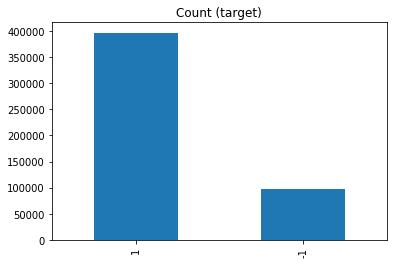

In [32]:
print('Class -1:', target_count[-1])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

# Resampling 

<h4>A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).<h4>

<b> Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

Let's implement a basic example

<b>

In [33]:
count_class_0, count_class_1 = df['normal'].value_counts()

# Divide by class
df_class_0 = df['normal'] == -1
df_class_1 = df['normal'] == 1

In [34]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
#df_test_under.df['normal.'].value_counts()
df_test_under.normal.value_counts()[df['normal.']]

#df_test_under.g.value_counts().plot(kind='bar', title='Count (target)');
#df_test_under.df['normal.'].value_counts().plot(kind='bar', title='Count (normal)')


Random under-sampling:


AttributeError: 'Series' object has no attribute 'normal'

In [ ]:
bro in above column, after three lines if you run the code like after df_test_under if use norma/attack column name it will show both equal and label. and its not running from me

In [52]:
print(df_class_0.value_counts())
print(df_class_1.value_counts())

False    494020
Name: normal., dtype: int64
False    494020
Name: normal., dtype: int64


False    591297
Name: normal., dtype: int64


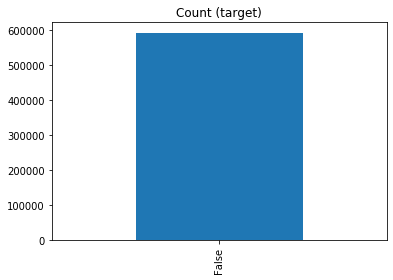

In [38]:
print(df_test_under.value_counts())
df_test_under.value_counts().plot(kind='bar', title='Count (target)');


In [ ]:
..